# Tala Sound

Philomène Blot, Elise Costa, Laura Garda

Encadrées par Pierre Jouvelot (Mines ParisTech) et Luc Perera (ENSAD)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import scipy

## Introduction - mise en contexte

Dans le cadre de la thèse de Luc Perera, liée au design médical, l'objectif du projet Tala Sound consiste à réaliser un dispositif interactif et sonore qui agit sur le comportement des patients atteints de démence, type Alzheimer.

<img src="Intro-1.PNG" alt="drawing" width="500"/>

Cet objet, appelé Tala Box (boîte composé d'une boule mobile), transmettra des sons et des vibrations, qui interagiront avec les mouvements des mains du patient.

<img src="Intro-3.PNG" alt="drawing" width="200"/>

En amont, des enregistrements de musique auront été effectuées, provenant de tablas (instrument de musique à percussion) utilisés dans la musique carnatique (musique du Sud de l'Inde possédant une très grande variété de structures rythmiques typiques, appelées "talas"). En effet, ce type de musique posséde des vertus apaisantes pour les patients agités. Ces sons vont également provoquer des effets de déplacement et de vibrations (micro-mouvements) sur le dessus élastique du support (c'est-à-dire la Tala Box) ; le patient pourra alors être incité à manipuler l’objet pour se calmer.

Nous devions donc nous concentrer sur ce dispositif, la Tala Box, pour que le patient réagisse aux mouvements de la surface de la Tala Box, en fonction du son de la musique ; et cela par la conception et la réalisation de 3 modules :
- un extracteur sémantique de son qui extrait les informations dynamiques musicales à partir d’un fichier son
- un compositeur de mouvement qui décide de la suite des actions à faire effectuer par la Tala Box à partir des données du module d’extraction du son
- un simulateur de la Tala Box qui affiche un graphique simplifié de la Tala Box en fonction des commandes générées par le module de composition du mouvement.

Nous avons choisi de nous orienter vers une programmation sous Python, car Python possédait déjà de nombreux modules pour l'analyse musicale mais aussi le développement de fenêtre graphique.

## I/ Analyse d'un morceau

Pour cet extracteur sémantique de son, nous avons dû procéder à une analyse musicale pour en extraire les données qui nous semblaient pertinentes au vu de l’objectif de la Tala Box : amplitude sonore, tempo et fréquences.

Toutes ces données varient bien évidemment au cours du temps (la musique n'étant pas "stationnaire"), nous avons dû effectuer un traitement dynamique de la musique. C'est pourquoi, nous nous sommes tournées vers la bibliothèque Python librOsa.

In [ ]:
# importer la librairie pour le traitement de la musique
import librosa
from librosa import display

# importer la librairie pour le widget de lecture
from IPython.display import Audio

In [ ]:
# récupération du morceau de musique caranatique que l'on cherche à analyser
audio_data = 'music.wav'

# lecture du morceau par la bibliothèque librosa
samples , sampling_rate = librosa.load(audio_data, sr = None)
    # samples renvoie les échantillons de musiques
    # sampling_rate renvoie la fréquence d'échantillonage du morceau ; par défaut, comme 'sr = None', elle est de 44100 Hz

# création du widget de lecture de musique
Audio(data = samples, rate = sampling_rate)

In [ ]:
# vérifier que tout fonctionne bien (bonne durée de musique)
duration_of_sound = len(samples)/sampling_rate
duration_of_sound

In [ ]:
# création de la liste des temps pour l'échantillonnage
t = np.linspace(0., duration_of_sound, len(samples))

In [ ]:
# affichage de la musique brute
plt.figure()
librosa.display.waveplot(y = samples, sr = sampling_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title('Musique carnatique')
plt.show()

### 1/ Amplitude

On va chercher à récupérer l'amplitude sonore de la musique.
On remarque aisément sur la figure précédente que le signal récupéré est très bruité.
On va donc lui appliquer dans un premier temps un filtre de Wiener, pour enlever le bruit (les grésillements).

In [ ]:
# importer la librairie pour le filtre de Wiener
from scipy import signal
from scipy.signal import wiener

On va faire plusieurs essais avec le filtre pour voir quels paramètre choisir.
En effet, si on prend un paramètre de fenêtre 'mysize' trop grand, on va perdre trop d'informations sur le signal. Au contraire, si il est trop petit, tout se passera comme si il n'y avait pas de filtre.

In [ ]:
# on applique le filtre sur le signal avec un paramètre 'mysize' différent à chaque fois
son_filtre1 = wiener(samples, 10)
son_filtre2 = wiener(samples, 100)
son_filtre3 = wiener(samples, 1000)

In [ ]:
# on trace la représentation des trois signaux et du signal original

plt.plot(t, samples, 'k', label='original signal')
plt.plot(t, son_filtre1, '-.', label='filtered signal, mysize = 10')
plt.plot(t, son_filtre2, '--', label='filtered signal, mysize = 100')
plt.plot(t, son_filtre3, ':', label='filtered signal, mysize = 1000')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

Les graphes tracés ne sont pas très lisibles. On peut regarder à différentes échelles de temps les résultats obtenus.

In [ ]:
# Graphe pour une échelle de temps de 1s
plt.plot(t[:sampling_rate], samples[:sampling_rate], 'k', label='original signal')
plt.plot(t[:sampling_rate], son_filtre1[:sampling_rate], '-.', label='filtered signal, mysize = 10')
plt.plot(t[:sampling_rate], son_filtre2[:sampling_rate], '--', label='filtered signal, mysize = 100')
plt.plot(t[:sampling_rate], son_filtre3[:sampling_rate], ':', label='filtered signal, mysize = 1000')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Graphe pour une échelle de temps de 10ms
plt.plot(t[:int(sampling_rate/100)], samples[:int(sampling_rate/100)], 'k', label='original signal')
plt.plot(t[:int(sampling_rate/100)], son_filtre1[:int(sampling_rate/100)], '-.', label='filtered signal, mysize = 10')
plt.plot(t[:int(sampling_rate/100)], son_filtre2[:int(sampling_rate/100)], '--', label='filtered signal, mysize = 100')
plt.plot(t[:int(sampling_rate/100)], son_filtre3[:int(sampling_rate/100)], ':', label='filtered signal, mysize = 1000')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

On voit bien qu'il y a eu une réduction de bruit. Mais, comme il s'agit ici d'utiliser les valeurs obtenues pour les appliquer sur un dispositif sensoriel, il faut s'assurer que la musique n'a pas été dénaturée.
Pour cela, on écoute ce que chacun des signaux donne.

In [ ]:
# Audio avec 'mysize = 10'
Audio(data = son_filtre1, rate = sampling_rate)

In [ ]:
# Audio avec 'mysize = 100'
Audio(data = son_filtre2, rate = sampling_rate)

In [ ]:
# Audio avec 'mysize = 1000'
Audio(data = son_filtre3, rate = sampling_rate)

Après écoute des morceaux, on en déduit que le paramètre 'mysize' le plus adapté est XXX.
La liste contenant les informations de l'amplitude sonore qui va nous servir par la suite est donc :

In [ ]:
son_filtre = abs(son_filtreXXX)

Une fois le bruit enlevé, on va chercher à filtrer le signal pour qu'il soit plus lisse ('smooth') et ainsi qu'il n'y ait pas de variations brusques, ce qui sera plus aisément analysable par la machine (voire partie XXX).

### 2/ Tempo

On va chercher à récupérer le tempo de la musique.

La musique caranatique présente une rythmique qui lui est propre (pas de binaire ou ternaire).
Elle utilise divers rythmes codifiés sous le nom de tâla. Ces rythmes peuvent faire l'objet de variations complexes. Un tâla contient une mesure contenant un certain nombre de temps. La mesure définie par le tâla commence par un temps accentué ou sam qui conclut la mesure précédente autant qu'il lance la nouvelle mesure. À l'intérieur de la mesure, les temps sont regroupés en sous-unités de longueur variable, marquées par un battement de main ou un simple geste silencieux qui n'implique pas nécessairement un accent.
Cette rythmique particulière nous ammène donc à d'abord tester notre algorithme sur un morceau de musique simple, dont on connaît déjà le tempo pour ensuite pouvoir l'appliquer au morceau de musique carnatique.

On va utiliser un enregistrement d'un métronome à 125 bpm.

In [ ]:
# récupération du morceau de métronome que l'on cherche à analyser
audio_test = 'tempo.wav'

# lecture du morceau par la bibliothèque librosa
samples_test , sr_test = librosa.load(audio_test, sr = None)
    # samples renvoie les échantillons de musiques
    # sampling_rate renvoie la fréquence d'échantillonage du morceau ; par défaut, comme 'sr = None', elle est de 44100 Hz

# création du widget de lecture de musique
Audio(data = samples_test, rate = sr_test)

In [ ]:
# vérifier que tout fonctionne bien (bonne durée de musique)
duration_of_sound_test = len(samples_test)/sr_test
duration_of_sound_test

In [ ]:
# affichage de la musique brute
plt.figure()
librosa.display.waveplot(y = samples_test, sr = sr_test)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title('Battements')
plt.show()

In [ ]:
# récupération de l'enveloppe du son de la musique de métronome (déterminer par les 'accoups')
onset_env_test = librosa.onset.onset_strength(samples_test, sr=sr_test)

# estimation des différents tempo/pulsation sur des fenêtres de 10ms (frame de 512 samples)
tempo_liste_test = librosa.beat.tempo(onset_envelope=onset_env_test, sr=sr_test, aggregate=None)
    # aggregate = None donne un tempo dynamique, ie.
    # la fonction donne ici une valeur de tempo sur des frame de 512 samples
    # et renvoie donc une liste de tempo

# vérification des paramètres donnés par la documentation de la fonction
ltempo_test = len(tempo_liste_test)

# conversion de la liste en tableau
tempo_array_test = np.array(tempo_liste_test)

In [ ]:
# création de la liste des temps pour l'échantillonnage du tempo
t_test = np.linspace(0., duration_of_sound_test, ltempo_test)

In [ ]:
plt.plot(t_test[:987], tempo_array_test[:987])
plt.xlabel('Time (s)')
plt.ylabel('Tempo')
plt.title('Tempo du morceau test à 125 bpm')
plt.grid()
plt.show()

On voit bien que le tempo du morceau est constant au cours du temps et égal à la valeur attendue de 125 bpm. On va donc pouvoir l'appliquer au morceau de musique carnatique.

In [ ]:
# récupération de l'enveloppe du son de la musique carnatique
onset_env = librosa.onset.onset_strength(samples, sr=sampling_rate)

# estimation des différents tempo/pulsation sur des fenêtres de 10ms (frame de 512 samples)
tempo_liste = librosa.beat.tempo(onset_envelope=onset_env, sr=sampling_rate, aggregate=None)
    # aggregate = None donne un tempo dynamique, ie.
    # la fonction donne ici une valeur de tempo sur des frame de 512 samples
    # et renvoie donc une liste de tempo

# vérification des paramètres donnés par la documentation de la fonction
ltempo = len(tempo_liste)

# conversion de la liste en tableau
tempo_array = np.array(tempo_liste)

In [ ]:
# création de la liste des temps pour l'échantillonnage du tempo
t_tempo = np.linspace(0., duration_of_sound, ltempo)

In [ ]:
plt.plot(t_tempo, tempo_array)
plt.xlabel('Time (s)')
plt.ylabel('Tempo')
plt.title('Tempo du morceau de musique carnatique')
plt.grid()
plt.show()

La liste contenant les informations du tempo qui va nous servir par la suite est donc :

In [ ]:
tempo_liste

On voit qu'on obtient des variaions de tempo, parfois brusques. On va donc chercher à filtrer le signal obtenu pour qu'il soit plus lisse ('smooth') et ainsi qu'il n'y ait pas de variations brusques, ce qui sera plus aisément analysable par la machine (voire partie XXX).

### 3/ Fréquence

## II/ Traitement : création du mouvement

### 1/ Méthode pour imposer un mouvement à partir des trois données calculées précédemment

Les encadrants nous ont laissé une grande liberté sur la traduction en mouvement des données obtenues à la partie 1.

Nous avons donc pris le parti pris de traduire le mouvement de la sorte :

- contraintes de la machine : le mouvement de la balle est restreint par les caractéristiques de la machine. La zone délimitée en vert correspond à la zone accessible à la balle.
<img src="des-mouvt-1.PNG" alt="drawing" width="200"/>

- choix du groupe : la hauteur de cette zone sera réduite en fonction de l'amplitude. Plus précisément, moins le volume est élevé, moins cette zone sera grande. La zone délimitée en orange ci-dessous illustre ce phénomène qualitativement.
<img src="des-mouvt-4.PNG" alt="drawing" width="200"/>

- choix du groupe : le mouvement de base la balle est un mouvement en triangle, comme l'illustre le dessin ci-dessous.
<img src="des-mouvt-3.PNG" alt="drawing" width="200"/>

- choix du groupe :  plus précisément, la caractéristiques de vitesse mouvement de base variera en fonction du tempo et de la fréquence. Plus précisément, la vitesse horizontale évoluera comme le tempo et la vitesse verticale comme la fréquence.

### 2/ Algorithme

On implémente ici l'algorithme décrit ci-dessus.

In [5]:
# importer les librairies pour le traitement des données obtenues dans la partie I/
import numpy as np
import pandas as pd

In [6]:
# **** CONSTANTES ****

duree_fenetre = 5 #en secondes
pas_echantillonnage = 0.1 #en seconde
#ATTENTION, nb_pos doit tomber juste et être un entier !!
nb_pos = int(duree_fenetre/pas_echantillonnage) #on veut un échantillon des positions avec un pas d'un dixième de seconde

gain_hor = 0.5
gain_vert = 2.5

Voici l'implémentation du mouvement :

In [7]:
def DataMouv(volume,frequence,tempo) : 
    
    #stocker la position
        # on stocke les données récoltées précédemment
        # on stocke les données de positions pour chaque temps
        # la balle doit être à la position (X[i],Y[i]) au ième dixième de seconde de la musique
    X=[0]   #abscisses
    Y=[0]   #ordonnées
     
    #sens de déplacement horizontal et vertical
    signe_hor, signe_vert = 1,1 #initialisation en (0,0)
    
    for n_f in range (nb_fenetre) :
        
        #donnees pour la fenêtre considérée
        vol = volume[n_f]
        freq = frequence[n_f]
        temp = tempo[n_f]
        
        #recherche de y_min et y_max en fonction du volume et de la position de départ
        #le volume est dans [0,1]
        h_deplacement_min = 40
        h_deplacement = h_deplacement_min + int((100 - h_deplacement_min)*vol)
        
        y0 = Y[nb_pos*n_f]
        if (y0+int(h_deplacement/2))<=100 and (y0-int(h_deplacement/2)-int(h_deplacement/2)%2)>=0 :
            y_max, y_min = y0+int(h_deplacement/2), y0-int(h_deplacement/2)-(h_deplacement/2)%2
        else :
            diff = min(100-y0, h_deplacement)
            y_max, y_min = y0+diff, y0-h_deplacement+diff
        
        for n_p in range (nb_pos) :
            
            x0 = X[nb_pos*n_f + n_p]
            y0 = Y[nb_pos*n_f + n_p]
            
            x_deplacement = gain_hor*temp
            y_deplacement = gain_vert*freq/2  #on divise par deux pour prendre en compte les proportions de la machine
            
            x_test = x0 + signe_hor*x_deplacement
            y_test = y0 + signe_vert*y_deplacement
            
            if x_test < 0 or x_test > 100 :
                signe_hor = -signe_hor  
            if y_test < y_min or y_test > y_max :
                signe_vert = -signe_vert
                
            X.append(x0 + signe_hor*x_deplacement)
            Y.append(y0 + signe_vert*y_deplacement)
    return X, Y

### 3/ Test sur des données constantes

In [8]:
# création d'une banque de données

volume = [1 for i in range(1,10)]
frequence = [1 for i in range(1,10)]
tempo = [1 for i in range(1,10)]
nb_fenetre = len(volume)

# on applique la formule à notre jeu de données
X_const, Y_const = DataMouv(volume,frequence,tempo)

Des conditions nécessaires pour que $(X_{const},Y_{const})$ fournisse des positions pertinentes sont que :
- les valeurs sont comprises entre 0 et 100 (toujours les cas)
- les valeurs en abscisses et en ordonnées sont réfulièrement espacées (la fréquence, le tempo et le volume échantillonnés sont ici toujours égaux à 1)

On va donc d'abord globalement ploter cesvaleurs pour éventuellement détecter une abération grossière, puis faire une vérification un peu plus précises 

Text(0.5, 0, 'Temps (en 10ème de seconde)')

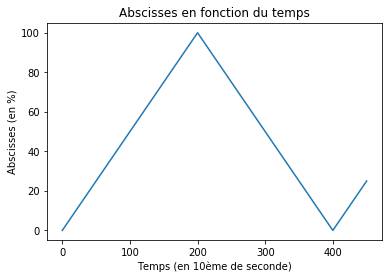

In [11]:
import matplotlib.pyplot as plt

temps = [i for i in range(len(X_const))]

plt.plot(temps, X_const)
plt.title("Abscisses en fonction du temps")
plt.ylabel("Abscisses (en %)")
plt.xlabel("Temps (en 10ème de seconde)")

Text(0.5, 0, 'Temps (en 10ème de seconde)')

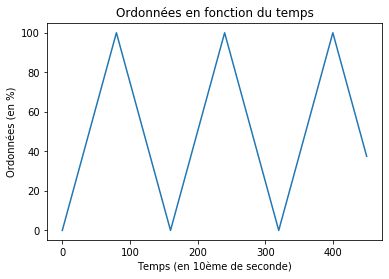

In [10]:
plt.plot(temps, Y_const)
plt.title("Ordonnées en fonction du temps")
plt.ylabel("Ordonnées (en %)")
plt.xlabel("Temps (en 10ème de seconde)")

Les résultats semblent cohérents. On va néanmoins effectuer des vérifications plus précises.

In [12]:
# min et max :
print("Le minimum de X est " + str(min(X_const)))
print("Le minimum de Y est " + str(min(Y_const)))
print("Le maximum de X est " + str(max(X_const)))
print("Le maximum de Y est " + str(max(Y_const)))

Le minimum de X est 0
Le minimum de Y est 0
Le maximum de X est 100.0
Le maximum de Y est 100.0


In [13]:
#espacement régulier

def diff_maxi(L):
    maxi = 0 #valeur minimale
    N = len(L)
    for i in range(1,N) :
        if abs(L[i-1]-L[i])>maxi :
            maxi = abs(L[i-1]-L[i])
    return maxi

def diff_mini(L):
    mini = 100 #valeur maximale
    N = len(L)
    for i in range(1,N) :
        if abs(L[i-1]-L[i])<mini :
            mini = abs(L[i-1]-L[i])
    return mini

print("Les valeurs de X sont régulièrement espacés :" + str(diff_mini(X_const)==diff_maxi(X_const)))
print("Les valeurs de Y sont régulièrement espacés :" + str(diff_mini(Y_const)==diff_maxi(Y_const)))

Les valeurs de X sont régulièrement espacés :True
Les valeurs de Y sont régulièrement espacés :True


Il semble donc que l'algorithme fonctionne bien sur ce jeu de valeurs.

### 4/ Mouvement pour le morceau indien

## III/ Animation : visualisation du mouvement

Nous avons réalisé une interface graphique avant de visualiser le mouvement.

Néanmoins, le mouvement est saccadé car pour faciliter l'implémentation, nous n'avons pas utiliser de positions intermédiaires autres que celles déterminées dans la partie III/.

En effet, il faut un minium de 16 images par seconde pour que le mouvement soit fluide, alors que nous n'en disposons que de 10. Il suffirait alors de réduire $pas\_echantillonnage$ (typiquement, le diviser par deux) pour que le mouvement apparaissent comme étant plus fluide.

Cependant, comme la machine réelle ne nécessite pas une telle précision sur le pas d'échantillonnage, on conserve le mouvement saccadé.

### 1/ Algorithme

In [14]:
# importation des librairies

from tkinter import *
from time import sleep

In [15]:
def Animation (X,Y) :
    
    #création du canvas pour l'animation
    main = Tk()
    main.geometry("360x400+400+360")  
    
    #dimension de la machine
    lng_rail, lrg_rail = 280, 10
    lng_tige1, lrg_tige1 = 90, 10
    lng_tige2, lrg_tige2 = 100, 15
    ray_boule = 30
    
    #position initiale de la machine 
    dec_rail_tige2 = 30
    x0_rail, y0_rail = 10, 360
    x0_tige2,y0_tige2 = x0_rail + dec_rail_tige2 , y0_rail
    x0_tige1,y0_tige1 = x0_tige2+(lrg_tige2-lrg_tige1)/2,y0_tige2-(lng_tige2-lng_tige1) #PROOOOBLE POUR 130
    x0_boule, y0_boule = x0_tige1+(lrg_tige1/2)-ray_boule,y0_tige1-lng_tige1
    
    #positions extremales de la machine (par rapport au bout en haut à gauche de la tige1)
    x_min_extr , x_max_extr = x0_tige2, x0_rail + lng_rail - dec_rail_tige2 
    y_max_extr , y_min_extr = y0_tige2-lng_tige2, y0_tige2-lng_tige1-lng_tige2
    #y_max_extr , y_min_extr =y0_tige2-(lng_tige2-lng_tige1)-lng_tige1, y0_tige2-(lng_tige2-lng_tige1) - 2*lng_tige1
    
    x_long = x_max_extr - x_min_extr
    y_long = y_max_extr - y_min_extr
    
    # déplacement de la machine
    X_dec = [(X[i]-X[i-1])*x_long/100 for i in range (1, len(X))]
    Y_dec = [(Y[i-1]-Y[i])*y_long/100 for i in range (1, len(Y))] #car y croissant du haut vers le bas
    nb_dec = len(X_dec)
    
    #création de l'environnement
    canvas = Canvas(main,width="360",height="400")
    rail = canvas.create_rectangle(x0_rail, y0_rail, x0_rail+lng_rail, y0_rail+lrg_rail, fill="slategrey")
    tige1 = canvas.create_rectangle(x0_tige1, y0_tige1, x0_tige1+lrg_tige1, y0_tige1-lng_tige1, fill="silver")
    tige2 = canvas.create_rectangle(x0_tige2, y0_tige2, x0_tige2+lrg_tige2, y0_tige2-lng_tige2, fill="dimgray")
    boule = canvas.create_oval(x0_boule, y0_boule, x0_boule+2*ray_boule , y0_boule-2*ray_boule,fill="mediumvioletred")
    
    canvas.pack()
    main.resizable(width=False,height=False)
    
    #mise à jour de la position de la balle
    for i in range(nb_dec) :
        sleep(pas_echantillonnage)
        canvas.move(boule,X_dec[i],Y_dec[i])
        canvas.move(tige1,X_dec[i],Y_dec[i])
        canvas.move(tige2,X_dec[i],0)  
        canvas.update()
    
    main.mainloop()

### 2/ Test sur des données constantes

Notre Jupyter est trop lent pour cette animation (qui fonctionne bien sous Spyder). On donne donc ci-dessous la commande pour obtenir le mouvement de l'animation (vidéo ci-dessous).

In [16]:
#Animation(X_const, Y_const)

In [17]:
from IPython.display import Video

In [18]:
%%HTML
<video width="320" height="420" controls>
  <source src="enregistrement-vitesse-1_1.mp4" type="video/mp4">
</video>

On propose aussi une visualisation pour :
- $volume = [1,0,0.5]*3$
- $frequence = [1]*9$
- $tempo = [1]*9$

On remarque que ce mouvement (qui est sensé être le plus rapide car toutes les valeurs des listes de données sont des $1$), est assez lent (la longueur de la machine est de XXX) : on va donc chercher à jouer sur la valeur du $gain_{hor}$ et du $gain_{vert}$ (définis au début de la partie $II/2$) pour accélerer le mouvement.

Néanmoins, avant de s'intéresser à ce point, pour mieux appréhender le mouvement, on propose aussi une visualisation pour :

- $amplitude = [1,0,0.5]*3$

- $frequence = [1]*9$

- $tempo = [1]*9$

In [20]:
%%HTML
<video width="320" height="420" controls>
  <source src="enregistrement-vitesse-2_1.mp4" type="video/mp4">
</video>

## IV / Affiner le mouvement